In [1]:
import numpy as np
import pandas as pd
import datetime
from datetime import timedelta
from matplotlib import dates
import matplotlib.pyplot as plt
import time

%matplotlib inline

In [2]:
def format_data(data):
    if (type(data) == str) :
        if (data == ' ') :
            return np.nan
        else :
            return np.float64(data)
    else :
        return data

In [3]:
def s_to_ns(x):
    return x/1.0e-9

In [4]:
df = pd.read_csv('./reference_waveforms/SiPM_out_N7098_1pe.csv')
dfpr = pd.read_csv('./reference_waveforms/Preamp_out_N7098_1pe.csv')
df_40V = pd.read_csv('./reference_waveforms/SiPM_1pe.csv')

In [5]:
df.columns

Index(['time (s)', 'IT("/IPRB0/MINUS") VOV 6  (A)', 'time (s).1',
       'IT("/IPRB0/MINUS") VOV 10  (A)'],
      dtype='object')

In [6]:
dfpr.columns

Index(['time (s)', 'VT("/Vout") VOV 6  (V)', 'time (s).1',
       'VT("/Vout") VOV 10  (V)'],
      dtype='object')

In [7]:
df_40V.columns

Index(['time (s)', 'IT("/IPRB0/MINUS") Ntot 7098  (A)', 'time (s).1',
       'IT("/IPRB0/MINUS") Ntot 7303  (A)'],
      dtype='object')

In [8]:
df.rename(columns={'IT("/IPRB0/MINUS") VOV 6  (A)'  :'Vov_6V',
                   'IT("/IPRB0/MINUS") VOV 10  (A)' :'Vov_10V'
                   },
          inplace=True)

In [9]:
dfpr.rename(columns={'VT("/Vout") VOV 6  (V)'  :'Vov_6V',
                   'VT("/Vout") VOV 10  (V)' :'Vov_10V'
                   },
          inplace=True)

In [10]:
df_40V.rename(columns={'IT("/IPRB0/MINUS") Ntot 7098  (A)' :'Ntot_7098',
                   'IT("/IPRB0/MINUS") Ntot 7303  (A)' :'Ntot_7303'
                   },
          inplace=True)

In [11]:
df.rename(columns={'time (s)'   :'time_01',
                   'time (s).1' :'time_02'
                  },
          inplace=True)

In [12]:
dfpr.rename(columns={'time (s)'   :'time_01',
                   'time (s).1' :'time_02'
                  },
          inplace=True)

In [13]:
df_40V.rename(columns={'time (s)'   :'time_01',
                   'time (s).1' :'time_02'
                  },
          inplace=True)

In [14]:
for x in df.columns :
     df[x]=df[x].map(format_data) 

In [15]:
for x in dfpr.columns :
     dfpr[x]=dfpr[x].map(format_data) 

In [16]:
for x in df_40V.columns :
     df_40V[x]=df_40V[x].map(format_data) 

In [17]:
df.describe()

time_01        Vov_6V     time_02       Vov_10V
count  558.000000  5.580000e+02  593.000000  5.930000e+02
mean     0.000004  6.676060e-06    0.000004  1.020817e-05
std      0.000004  9.752138e-06    0.000004  1.622326e-05
min      0.000000 -1.421495e-06    0.000000 -8.607718e-05
25%      0.000003  3.081114e-10    0.000003  5.727545e-10
50%      0.000003  3.402478e-06    0.000003  5.867125e-06
75%      0.000003  8.891774e-06    0.000003  1.287201e-05
max      0.000020  3.284049e-05    0.000020  5.331081e-05

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593 entries, 0 to 592
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   time_01  558 non-null    float64
 1   Vov_6V   558 non-null    float64
 2   time_02  593 non-null    float64
 3   Vov_10V  593 non-null    float64
dtypes: float64(4)
memory usage: 18.7 KB


In [19]:
dfpr.describe()

time_01      Vov_6V     time_02     Vov_10V
count  558.000000  558.000000  593.000000  593.000000
mean     0.000004    0.901245    0.000004    0.901201
std      0.000004    0.000368    0.000004    0.000578
min      0.000000    0.898491    0.000000    0.896718
25%      0.000003    0.901318    0.000003    0.901313
50%      0.000003    0.901323    0.000003    0.901320
75%      0.000003    0.901327    0.000003    0.901327
max      0.000020    0.901500    0.000020    0.901603

In [20]:
dfpr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593 entries, 0 to 592
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   time_01  558 non-null    float64
 1   Vov_6V   558 non-null    float64
 2   time_02  593 non-null    float64
 3   Vov_10V  593 non-null    float64
dtypes: float64(4)
memory usage: 18.7 KB


In [21]:
df_40V.describe()

time_01     Ntot_7098     time_02     Ntot_7303
count  596.000000  5.960000e+02  570.000000  5.700000e+02
mean     0.000004  1.327609e-06    0.000004  1.194095e-06
std      0.000004  1.946883e-06    0.000004  1.886296e-06
min      0.000000 -1.261630e-06    0.000000 -1.243155e-06
25%      0.000003  2.020290e-10    0.000003  1.278987e-10
50%      0.000003  5.825820e-08    0.000003  2.391078e-08
75%      0.000003  3.718394e-06    0.000003  2.194397e-06
max      0.000020  8.556659e-06    0.000020  8.393827e-06

In [22]:
df_40V.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596 entries, 0 to 595
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time_01    596 non-null    float64
 1   Ntot_7098  596 non-null    float64
 2   time_02    570 non-null    float64
 3   Ntot_7303  570 non-null    float64
dtypes: float64(4)
memory usage: 18.8 KB


In [23]:
df_model01=df.copy(deep=True)
df_model02=df.copy(deep=True)

In [24]:
df_model01=df_model01[['time_01','Vov_6V']]
df_model02=df_model02[['time_02','Vov_10V']]

In [25]:
df_model01['time_ns_01']=df_model01['time_01'].apply(s_to_ns)
df_model02['time_ns_02']=df_model02['time_02'].apply(s_to_ns)

In [26]:
df_model01.dropna(inplace=True)
df_model02.dropna(inplace=True)

In [27]:
df_model01.drop(columns=['time_01'], inplace=True)
df_model02.drop(columns=['time_02'], inplace=True)

In [28]:
df_model01.set_index('time_ns_01',inplace=True)
df_model02.set_index('time_ns_02',inplace=True)

<Axes: xlabel='time_ns_02'>

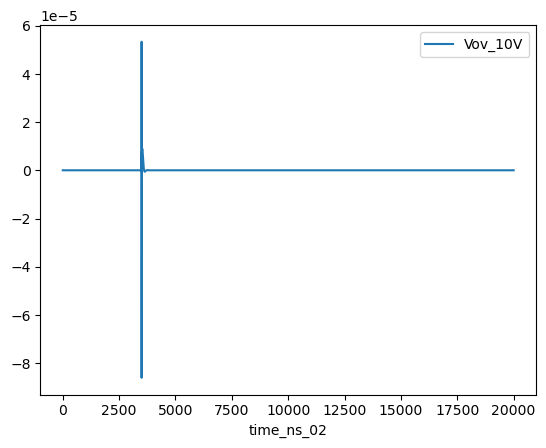

In [29]:
df_model02.plot()

In [30]:
dfpr_model01=dfpr.copy(deep=True)
dfpr_model02=dfpr.copy(deep=True)

In [31]:
dfpr_model01=dfpr_model01[['time_01','Vov_6V']]
dfpr_model02=dfpr_model02[['time_02','Vov_10V']]

In [32]:
dfpr_model01['time_ns_01']=dfpr_model01['time_01'].apply(s_to_ns)
dfpr_model02['time_ns_02']=dfpr_model02['time_02'].apply(s_to_ns)

In [33]:
dfpr_model01.dropna(inplace=True)
dfpr_model02.dropna(inplace=True)

In [34]:
dfpr_model01.drop(columns=['time_01'], inplace=True)
dfpr_model02.drop(columns=['time_02'], inplace=True)

In [35]:
dfpr_model01.set_index('time_ns_01',inplace=True)
dfpr_model02.set_index('time_ns_02',inplace=True)

<Axes: xlabel='time_ns_02'>

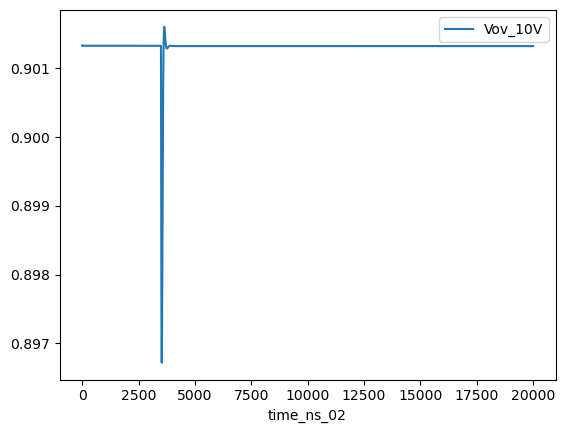

In [36]:
dfpr_model02.plot()

In [37]:
df_model01_40V=df_40V.copy(deep=True)
df_model02_40V=df_40V.copy(deep=True)

In [38]:
df_model01_40V=df_model01_40V[['time_01','Ntot_7098']]
df_model02_40V=df_model02_40V[['time_02','Ntot_7303']]

In [39]:
df_model01_40V['time_ns_01']=df_model01_40V['time_01'].apply(s_to_ns)
df_model02_40V['time_ns_02']=df_model02_40V['time_02'].apply(s_to_ns)

In [40]:
df_model01_40V.dropna(inplace=True)
df_model02_40V.dropna(inplace=True)

In [41]:
df_model01_40V.drop(columns=['time_01'], inplace=True)
df_model02_40V.drop(columns=['time_02'], inplace=True)

In [42]:
df_model01_40V.set_index('time_ns_01',inplace=True)
df_model02_40V.set_index('time_ns_02',inplace=True)

<Axes: xlabel='time_ns_01'>

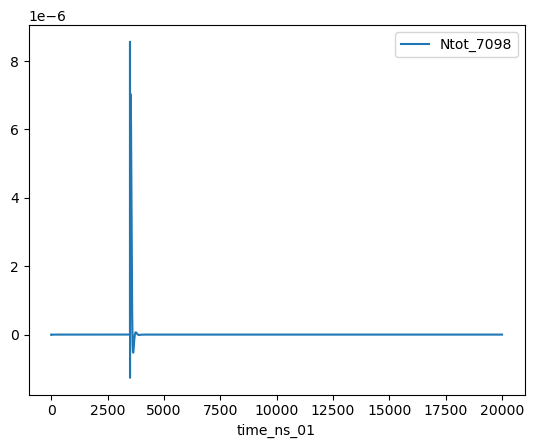

In [43]:
df_model01_40V.plot()

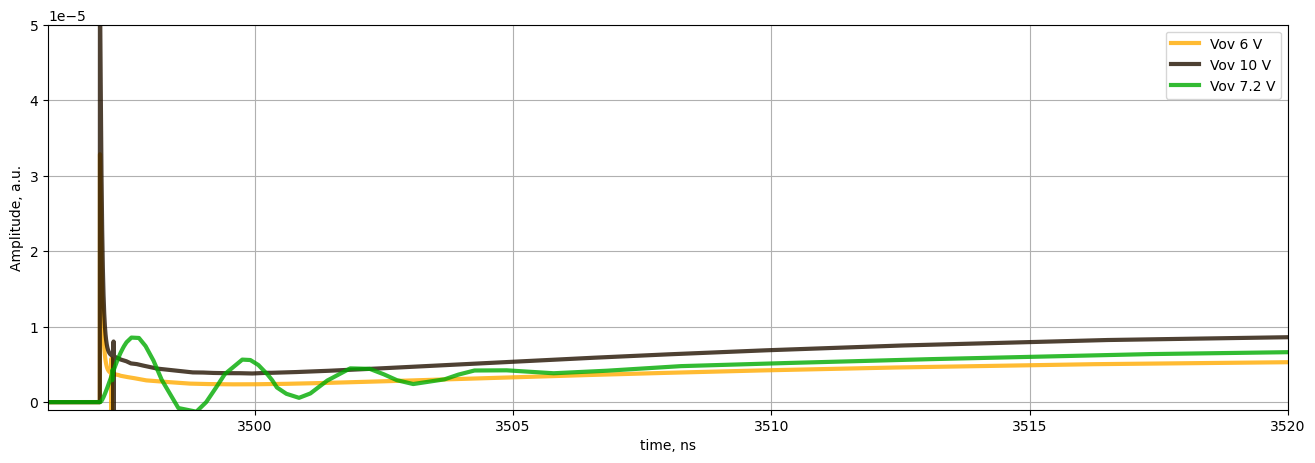

In [44]:
xlim=(3496,3520)
ylim=(-0.1*1.0e-5,5*1.0e-5)
ax=df_model01.plot( alpha=0.8, figsize=(16,5),xlim=xlim, ylim=ylim, c='#FFAA00',linewidth=3,label='Vov 6 V')
df_model02.plot(ax=ax, alpha=0.8,c='#221100',linewidth=3,label='Vov 10 V')
df_model01_40V.plot(ax=ax, alpha=0.8,c='#00AA00',linewidth=3,label='Vov 7.2 V')
ax.set(xlabel='time, ns',ylabel='Amplitude, a.u.')
ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.legend(['Vov 6 V','Vov 10 V','Vov 7.2 V'])

In [45]:
df_model01.to_csv('FBK_1pe_noampl_6vov.csv',sep=' ',header=False)
df_model02.to_csv('FBK_1pe_noampl_10vov.csv',sep=' ',header=False)

In [46]:
##########
##########

In [48]:
dfpr_model01_norm=dfpr_model01.copy(deep=True)
dfpr_model02_norm=dfpr_model02.copy(deep=True)

In [49]:
n_ped=100
#
print(np.mean(dfpr_model01_norm[0:n_ped]))
print(np.std(dfpr_model01_norm[0:n_ped]))
#
print(np.mean(dfpr_model02_norm[0:n_ped]))
print(np.std(dfpr_model02_norm[0:n_ped]))
#
pedestal01=np.mean(dfpr_model01[0:n_ped])
pedestal02=np.mean(dfpr_model02[0:n_ped])

0.9013272008650097
Vov_6V    7.522873e-07
dtype: float64
0.9013271967677954
Vov_10V    7.522874e-07
dtype: float64


In [50]:
dfpr_model01_norm['Vov_6V']=-(dfpr_model01_norm['Vov_6V']-pedestal01)
dfpr_model02_norm['Vov_10V']=-(dfpr_model02_norm['Vov_10V']-pedestal02)

<Axes: xlabel='time_ns_01'>

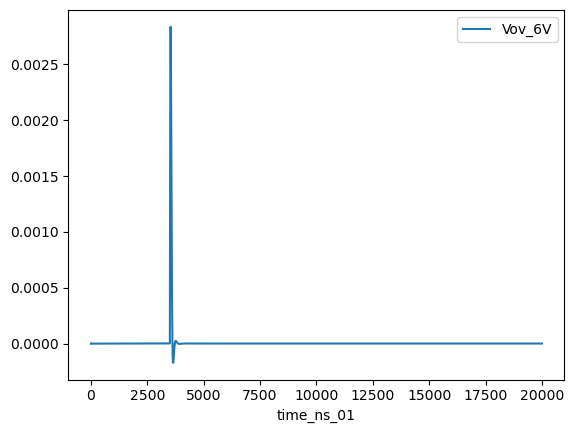

In [52]:
dfpr_model01_norm.plot()

<Axes: xlabel='time_ns_02'>

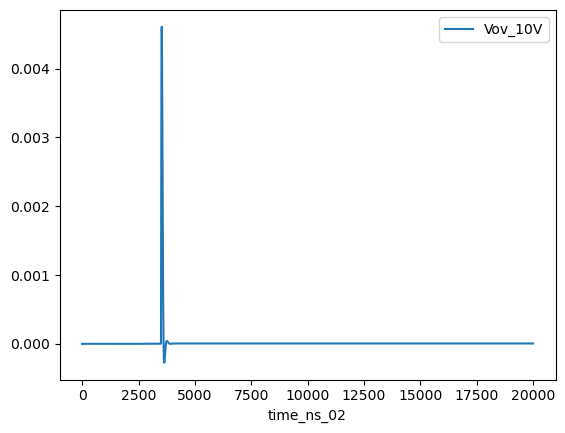

In [53]:
dfpr_model02_norm.plot()

In [54]:
dfpr_model01_norm.to_csv('FBK_MT_ampl_30um_Vov6_Ntot_7098.csv',sep=' ',header=False)

In [55]:
dfpr_model02_norm.to_csv('FBK_MT_ampl_30um_Vov10_Ntot_7098.csv',sep=' ',header=False)

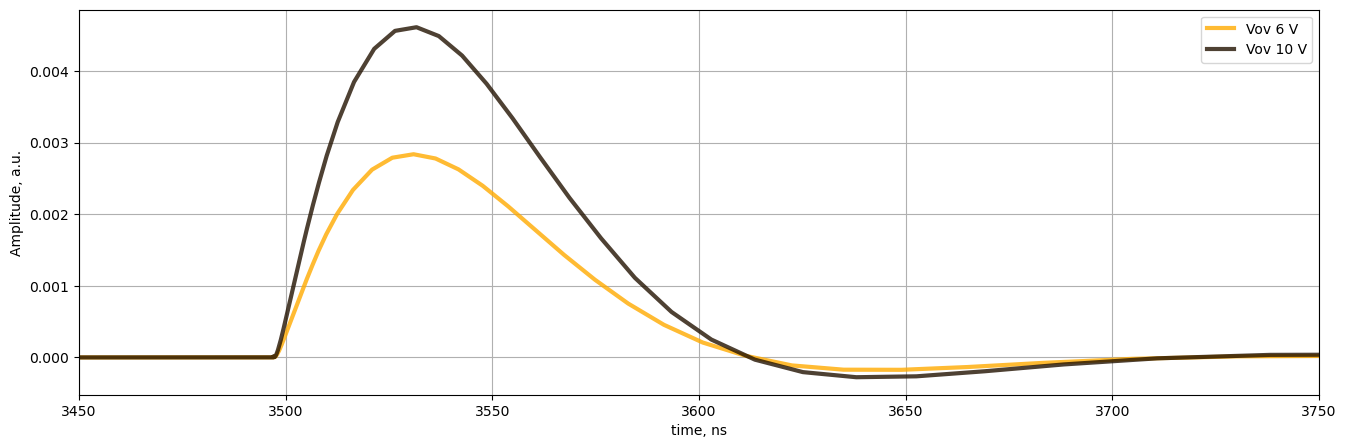

In [59]:
xlim=(3450,3750)
#ylim=(-0.1*1.0e-5,5*1.0e-5)
ax=dfpr_model01_norm.plot( alpha=0.8, figsize=(16,5),xlim=xlim, c='#FFAA00',linewidth=3,label='Vov 6 V')
dfpr_model02_norm.plot(ax=ax, alpha=0.8,c='#221100',linewidth=3,label='Vov 10 V')
ax.set(xlabel='time, ns',ylabel='Amplitude, a.u.')
ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.legend(['Vov 6 V','Vov 10 V'])